In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
epl = pd.read_excel('C:\\Users\\Admin\\Desktop\\EF 17-18 model\\Engsoccer2017-18.xlsx')
print(epl.columns.tolist())
a=epl.HomeTeam.unique()
print(a)
len(a)
epl

['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']
['Arsenal' 'Brighton' 'Chelsea' 'Crystal Palace' 'Everton' 'Southampton'
 'Watford' 'West Brom' 'Man United' 'Newcastle' 'Bournemouth' 'Burnley'
 'Leicester' 'Liverpool' 'Stoke' 'Swansea' 'Huddersfield' 'Tottenham'
 'Man City' 'West Ham' "Nott'm Forest" 'Sunderland' 'Aston Villa'
 'Bristol City' 'Burton' 'Fulham' 'Ipswich' 'Preston' 'QPR'
 'Sheffield United' 'Wolves' 'Bolton' 'Barnsley' 'Birmingham' 'Brentford'
 'Cardiff' 'Derby' 'Hull' 'Leeds' 'Middlesbrough' 'Millwall' 'Reading'
 'Sheffield Weds' 'Norwich' 'Bradford' 'Bury' 'Charlton' 'Doncaster'
 'Fleetwood Town' 'Milton Keynes Dons' 'Oldham' 'Peterboro' 'Portsmouth'
 'Scunthorpe' 'Shrewsbury' 'Southend' 'AFC Wimbledon' 'Blackburn'
 'Blackpool' 'Bristol Rvs' 'Gillingham' 'Northampton' 'Oxford' 'Plymouth'
 'Rochdale' 'Rotherham' 'Walsall' 'Wigan' 'Accrington' 'Carlisle'
 'Chesterfield' 'Coventry' 'Crawley Town' 'Crewe' 'Exeter' 'Forest Green'
 'Luton' 'Morecambe' 'Stevena

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,EPL,2017-11-08 00:00:00,Arsenal,Leicester,4,3,H
1,EPL,2017-12-08 00:00:00,Brighton,Man City,0,2,A
2,EPL,2017-12-08 00:00:00,Chelsea,Burnley,2,3,A
3,EPL,2017-12-08 00:00:00,Crystal Palace,Huddersfield,0,3,A
4,EPL,2017-12-08 00:00:00,Everton,Stoke,1,0,H
...,...,...,...,...,...,...,...
2031,FL2,2018-05-05 00:00:00,Lincoln,Yeovil,1,1,D
2032,FL2,2018-05-05 00:00:00,Mansfield,Crawley Town,1,1,D
2033,FL2,2018-05-05 00:00:00,Notts County,Luton,0,0,D
2034,FL2,2018-05-05 00:00:00,Swindon,Accrington,3,0,H


In [3]:
#defining home and away wins
epl['home_win']=np.where(epl['FTR']=='H',1,np.where(epl['FTR']=='D',.5,0))
epl['away_win']=np.where(epl['FTR']=='A',1,np.where(epl['FTR']=='D',.5,0))
epl['g']=1
epl

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,home_win,away_win,g
0,EPL,2017-11-08 00:00:00,Arsenal,Leicester,4,3,H,1.0,0.0,1
1,EPL,2017-12-08 00:00:00,Brighton,Man City,0,2,A,0.0,1.0,1
2,EPL,2017-12-08 00:00:00,Chelsea,Burnley,2,3,A,0.0,1.0,1
3,EPL,2017-12-08 00:00:00,Crystal Palace,Huddersfield,0,3,A,0.0,1.0,1
4,EPL,2017-12-08 00:00:00,Everton,Stoke,1,0,H,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
2031,FL2,2018-05-05 00:00:00,Lincoln,Yeovil,1,1,D,0.5,0.5,1
2032,FL2,2018-05-05 00:00:00,Mansfield,Crawley Town,1,1,D,0.5,0.5,1
2033,FL2,2018-05-05 00:00:00,Notts County,Luton,0,0,D,0.5,0.5,1
2034,FL2,2018-05-05 00:00:00,Swindon,Accrington,3,0,H,1.0,0.0,1


In [4]:
#finding the no. of home wins, goals scored in home, goals conceded in home
Enghome = epl.groupby(['HomeTeam','Div'])[['g','home_win', 'FTHG','FTAG']].sum().reset_index()
Enghome = Enghome.rename(columns={'HomeTeam':'team','g':'home_games','FTHG':'hs_goals','FTAG':'hc_goals'})
Enghome

,team,Div,home_games,home_win,hs_goals,hc_goals
0,AFC Wimbledon,FL1,23,11.0,25,30
1,Accrington,FL2,23,18.5,42,19
2,Arsenal,EPL,19,16.0,54,20
3,Aston Villa,FLCH,23,17.5,42,19
4,Barnet,FL2,23,11.0,24,25
...,...,...,...,...,...,...
87,West Ham,EPL,19,10.0,24,26
88,Wigan,FL1,23,17.0,37,11
89,Wolves,FLCH,23,18.5,47,18
90,Wycombe,FL2,23,14.5,43,35


In [5]:
#finding the no. of away wins, goals scored in away, goals conceded in away
Engaway = epl.groupby('AwayTeam')[['g','away_win', 'FTAG','FTHG']].sum().reset_index()
Engaway = Engaway.rename(columns={'AwayTeam':'team','g':'away_games','FTAG':'as_goals','FTHG':'ac_goals'})
Engaway

,team,away_games,away_win,as_goals,ac_goals
0,AFC Wimbledon,23,9.0,22,28
1,Accrington,23,13.5,34,27
2,Arsenal,19,6.0,20,31
3,Aston Villa,23,12.0,30,23
4,Barnet,23,6.0,22,40
...,...,...,...,...,...
87,West Ham,19,6.0,24,42
88,Wigan,23,17.5,52,18
89,Wolves,23,16.0,35,21
90,Wycombe,23,15.5,36,25


In [6]:
#merging home and away data
epl = pd.merge(Enghome , Engaway , on = 'team')

In [7]:
epl

,team,Div,home_games,home_win,hs_goals,hc_goals,away_games,away_win,as_goals,ac_goals
0,AFC Wimbledon,FL1,23,11.0,25,30,23,9.0,22,28
1,Accrington,FL2,23,18.5,42,19,23,13.5,34,27
2,Arsenal,EPL,19,16.0,54,20,19,6.0,20,31
3,Aston Villa,FLCH,23,17.5,42,19,23,12.0,30,23
4,Barnet,FL2,23,11.0,24,25,23,6.0,22,40
...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,19,10.0,24,26,19,6.0,24,42
88,Wigan,FL1,23,17.0,37,11,23,17.5,52,18
89,Wolves,FLCH,23,18.5,47,18,23,16.0,35,21
90,Wycombe,FL2,23,14.5,43,35,23,15.5,36,25


In [8]:
#finiding total wins and goal details of all teams
epl['G'] = epl['home_games'] + epl['away_games']
epl['W'] = epl['home_win'] + epl['away_win']
epl['GF'] = epl['hs_goals'] + epl['as_goals']
epl['GA'] = epl['hc_goals'] + epl['ac_goals']

In [9]:
epl

,team,Div,home_games,home_win,hs_goals,hc_goals,away_games,away_win,as_goals,ac_goals,G,W,GF,GA
0,AFC Wimbledon,FL1,23,11.0,25,30,23,9.0,22,28,46,20.0,47,58
1,Accrington,FL2,23,18.5,42,19,23,13.5,34,27,46,32.0,76,46
2,Arsenal,EPL,19,16.0,54,20,19,6.0,20,31,38,22.0,74,51
3,Aston Villa,FLCH,23,17.5,42,19,23,12.0,30,23,46,29.5,72,42
4,Barnet,FL2,23,11.0,24,25,23,6.0,22,40,46,17.0,46,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,19,10.0,24,26,19,6.0,24,42,38,16.0,48,68
88,Wigan,FL1,23,17.0,37,11,23,17.5,52,18,46,34.5,89,29
89,Wolves,FLCH,23,18.5,47,18,23,16.0,35,21,46,34.5,82,39
90,Wycombe,FL2,23,14.5,43,35,23,15.5,36,25,46,30.0,79,60


In [10]:
#defining the win percentage and pythagorean expectation for each team
epl['wp'] = epl['W']/epl['G']
epl['pyex'] = epl['GF']**2 / (epl['GF']**2 + epl['GA']**2) 
epl

,team,Div,home_games,home_win,hs_goals,hc_goals,away_games,away_win,as_goals,ac_goals,G,W,GF,GA,wp,pyex
0,AFC Wimbledon,FL1,23,11.0,25,30,23,9.0,22,28,46,20.0,47,58,0.434783,0.396375
1,Accrington,FL2,23,18.5,42,19,23,13.5,34,27,46,32.0,76,46,0.695652,0.731880
2,Arsenal,EPL,19,16.0,54,20,19,6.0,20,31,38,22.0,74,51,0.578947,0.677974
3,Aston Villa,FLCH,23,17.5,42,19,23,12.0,30,23,46,29.5,72,42,0.641304,0.746114
4,Barnet,FL2,23,11.0,24,25,23,6.0,22,40,46,17.0,46,65,0.369565,0.333701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,19,10.0,24,26,19,6.0,24,42,38,16.0,48,68,0.421053,0.332564
88,Wigan,FL1,23,17.0,37,11,23,17.5,52,18,46,34.5,89,29,0.750000,0.904017
89,Wolves,FLCH,23,18.5,47,18,23,16.0,35,21,46,34.5,82,39,0.750000,0.815525
90,Wycombe,FL2,23,14.5,43,35,23,15.5,36,25,46,30.0,79,60,0.652174,0.634184


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


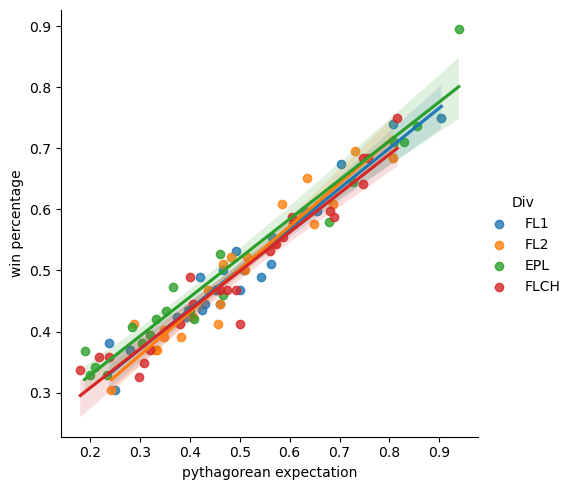

In [11]:
#scatter plot with regression line
sns.lmplot(x = 'pyex', y = 'wp', data = epl, hue='Div')
plt.xlabel('pythagorean expectation')
plt.ylabel('win percentage')
plt.savefig("pyex.jpg")

In [12]:
#regression model summary
#x = smf.ols(formula='wp ~ pyex',data=epl).fit()
#x.summary()